In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd

file_path = r'C:\Users\Ganesh Babu\Desktop\Final Project\Project 1 - NLP Sentiment Analysis on Healthcare Reviews\healthcare_reviews.csv'

# Check if the file exists
if os.path.exists(file_path):
    print("File exists!")
    df = pd.read_csv(file_path)  # Use read_csv for CSV files
    print(df.head())  # Display the first few rows of the data
else:
    print("File not found. Please check the file path.")





File exists!
                                         Review_Text  Rating
0        I have mixed feelings about my experience.        4
1  The staff was caring and attentive. I couldn't...       5
2        I have mixed feelings about my experience.        5
3        I have mixed feelings about my experience.        5
4  The healthcare provider was excellent. I had a...       3


In [3]:
df.shape

(1000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  900 non-null    object
 1   Rating       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,Rating
count,1000.000000
mean,3.058000
std,1.425015
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [6]:
df_counts = df["Rating"].value_counts().reset_index()
df_counts.head()

,Rating,count
0,4,223
1,5,211
2,2,209
3,1,189
4,3,168


In [7]:
df.isnull().sum()

Review_Text    100
Rating           0
dtype: int64

In [8]:
df.sample(5)

,Review_Text,Rating
393,The healthcare provider was excellent. I had a...,1
478,I'm very satisfied with the service I received...,4
813,I have mixed feelings about my experience.,3
472,I have mixed feelings about my experience.,1
919,It was an average experience. Neither good nor...,2


In [9]:
#sentiment model

In [10]:
import numpy as np

def create_sentiment(Rating):
    
    if Rating==1 or Rating==2:
        return -1 # negative sentiment
    elif Rating==4 or Rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['Sentiment'] = df['Rating'].apply(create_sentiment)

In [11]:
print(df)

                                           Review_Text  Rating  Sentiment
0          I have mixed feelings about my experience.        4          1
1    The staff was caring and attentive. I couldn't...       5          1
2          I have mixed feelings about my experience.        5          1
3          I have mixed feelings about my experience.        5          1
4    The healthcare provider was excellent. I had a...       3          0
..                                                 ...     ...        ...
995  My experience was terrible. I would not recomm...       5          1
996  The service was disappointing. I won't be comi...       4          1
997    The service was okay, but nothing exceptional.        3          0
998        I have mixed feelings about my experience.        5          1
999  The staff was caring and attentive. I couldn't...       4          1

[1000 rows x 3 columns]


In [12]:
#data preprocessing

In [13]:
df.dropna(axis=0, how="any", subset=None, inplace= True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  900 non-null    object
 1   Rating       900 non-null    int64 
 2   Sentiment    900 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 28.1+ KB


In [15]:
df.isnull().sum()

Review_Text    0
Rating         0
Sentiment      0
dtype: int64

In [16]:
df['Sentiment'].value_counts()

Sentiment
 1    388
-1    365
 0    147
Name: count, dtype: int64

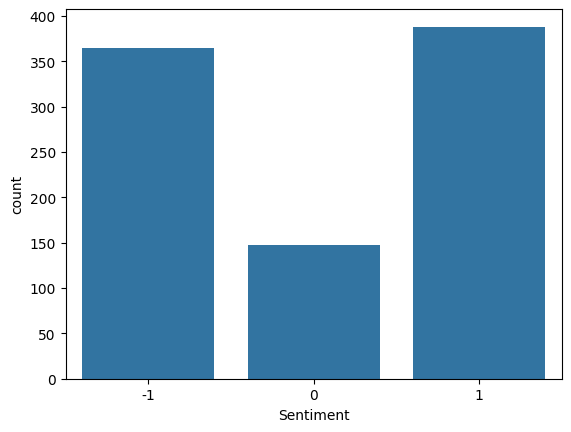

In [17]:
sns.countplot(x='Sentiment',data= df)
plt.show()

In [18]:
def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [19]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer_porter(text):
    token = []
    for word in text.split():
        token.append(porter.stem(word))
    
    return token

In [20]:
#model evaluvation

In [21]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import spacy

from sklearn.model_selection import train_test_split

y = df['Sentiment'] 
X = df['Review_Text']

my_additional_stop_words = []

#stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)
from spacy.lang.de.stop_words import STOP_WORDS
tfidf = TfidfVectorizer(stop_words=list(STOP_WORDS),
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

X_tfidf = tfidf.fit_transform(X)

# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.186, random_state=142)

In [22]:
X_train 

<732x51 sparse matrix of type '<class 'numpy.float64'>'
	with 6763 stored elements in Compressed Sparse Row format>

In [23]:
# logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
predictions = clf.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,predictions))
print('The classification report is:','\n',classification_report(y_test,predictions))

The accuracy score is: 0.49404761904761907
The confusion matrix is: 
 [[35  0 36]
 [10  0 15]
 [24  0 48]]
The classification report is: 
               precision    recall  f1-score   support

          -1       0.51      0.49      0.50        71
           0       0.00      0.00      0.00        25
           1       0.48      0.67      0.56        72

    accuracy                           0.49       168
   macro avg       0.33      0.39      0.35       168
weighted avg       0.42      0.49      0.45       168



In [26]:
#DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
dtc_predictions = dtc.predict(X_test)

In [30]:
print('The accuracy score is:',accuracy_score(y_test,dtc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,dtc_predictions))
print('The classification report is:','\n',classification_report(y_test,dtc_predictions))

The accuracy score is: 0.47619047619047616
The confusion matrix is: 
 [[40  0 31]
 [12  0 13]
 [32  0 40]]
The classification report is: 
               precision    recall  f1-score   support

          -1       0.48      0.56      0.52        71
           0       0.00      0.00      0.00        25
           1       0.48      0.56      0.51        72

    accuracy                           0.48       168
   macro avg       0.32      0.37      0.34       168
weighted avg       0.41      0.48      0.44       168



In [31]:
#RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
rfc_predictions = rfc.predict(X_test)

In [35]:
print('The accuracy score is:',accuracy_score(y_test,rfc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,rfc_predictions))
print('The classification report is:','\n',classification_report(y_test,rfc_predictions))

The accuracy score is: 0.4523809523809524
The confusion matrix is: 
 [[44  0 27]
 [15  0 10]
 [40  0 32]]
The classification report is: 
               precision    recall  f1-score   support

          -1       0.44      0.62      0.52        71
           0       0.00      0.00      0.00        25
           1       0.46      0.44      0.45        72

    accuracy                           0.45       168
   macro avg       0.30      0.35      0.32       168
weighted avg       0.39      0.45      0.41       168



[0.3933386864732845, 0.3907290307470975, 0.3935394292214527, 0.3921844156713172, 0.3976546555589012, 0.39355615778380004, 0.3989929405466894, 0.39350597209675797, 0.3962661848840711, 0.3990096691090368, 0.3990096691090368]


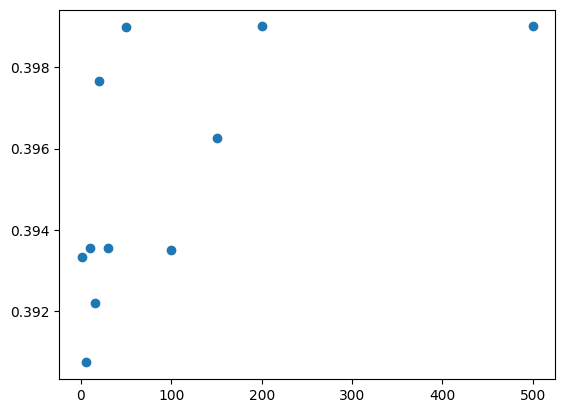

In [36]:
#K-fold cross validation should be used to tune the model
from sklearn.model_selection import cross_val_score

n = [1 ,5 ,10, 15, 20, 30, 50, 100, 150, 200, 500]
val_results = []

for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    val_results.append(cross_val_score(clf, X_train, y_train,cv=9).mean())
    
plt.scatter(n, val_results)
print(val_results)

In [37]:
final_rfc = RandomForestClassifier(n_estimators=600)

final_rfc.fit(X_train, y_train)
final_predictions = final_rfc.predict(X_test)

In [38]:
print('The accuracy score is:',accuracy_score(y_test,final_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,final_predictions))
print('The classification report is:','\n',classification_report(y_test,final_predictions))

The accuracy score is: 0.49404761904761907
The confusion matrix is: 
 [[35  0 36]
 [10  0 15]
 [24  0 48]]
The classification report is: 
               precision    recall  f1-score   support

          -1       0.51      0.49      0.50        71
           0       0.00      0.00      0.00        25
           1       0.48      0.67      0.56        72

    accuracy                           0.49       168
   macro avg       0.33      0.39      0.35       168
weighted avg       0.42      0.49      0.45       168



In [39]:
#KNeighborsClassifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

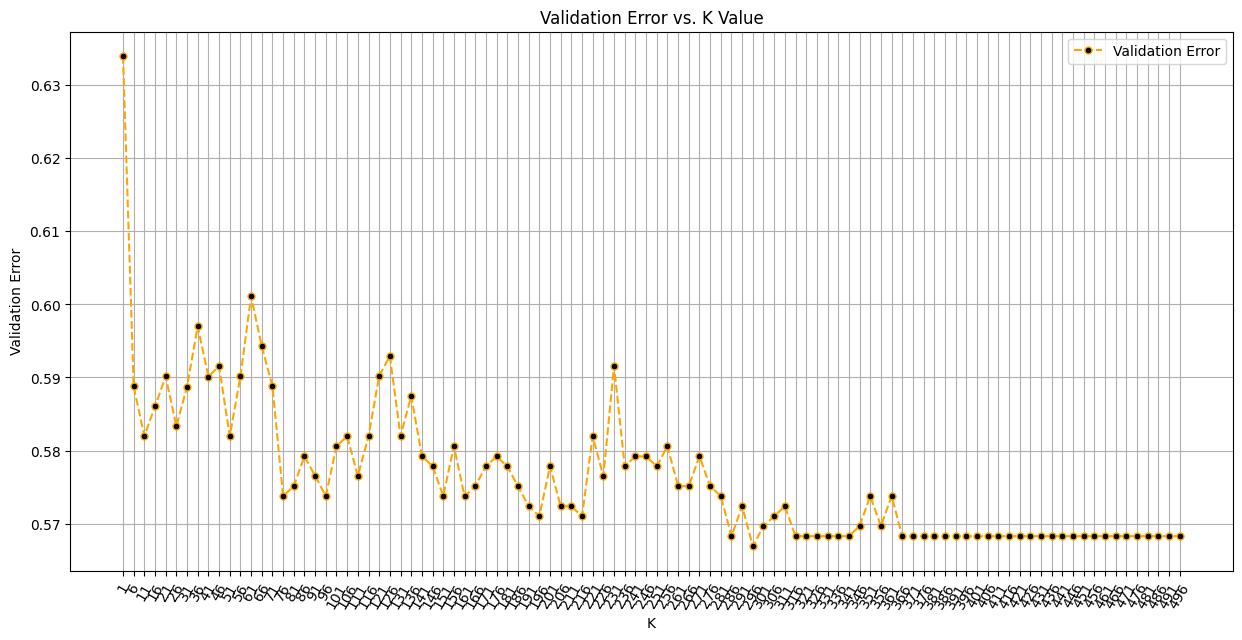

In [41]:
### Tuning using K-fold Cross Validation

from sklearn.model_selection import cross_val_score

val_error_rate = []
neighbors_range = range(1,500,5)

for i in neighbors_range:
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    val_error = 1 - cross_val_score(knn, X_train, y_train,cv=5).mean()
    val_error_rate.append(val_error)

# Plot settings
plt.figure(figsize=(15,7))
plt.plot(neighbors_range, val_error_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')
plt.xticks(np.arange(neighbors_range.start, neighbors_range.stop, neighbors_range.step), rotation=60)
plt.grid()
plt.legend()
plt.title('Validation Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Validation Error')
plt.show()

In [42]:
best_k = neighbors_range[val_error_rate.index(min(val_error_rate))]
best_k

296

The accuracy score is: 0.42857142857142855
The classification report is: 
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        71
           0       0.00      0.00      0.00        25
           1       0.43      1.00      0.60        72

    accuracy                           0.43       168
   macro avg       0.14      0.33      0.20       168
weighted avg       0.18      0.43      0.26       168



<Axes: >

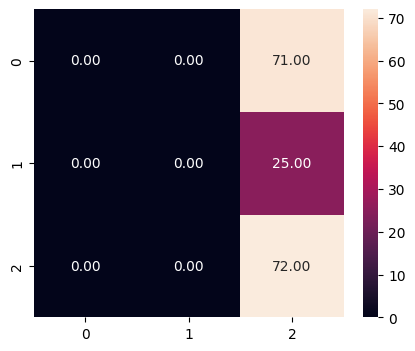

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,knn_predictions))
print('The classification report is:','\n',classification_report(y_test,knn_predictions))

matrix=confusion_matrix(y_test,knn_predictions)
plt.figure(figsize = (5,4))
sns.heatmap(matrix, annot=True, fmt = '.2f')

In [44]:
from sklearn.ensemble import RandomForestClassifier

final_rfc = RandomForestClassifier(n_estimators=7)

final_rfc.fit(X_train, y_train)
final_predictions = final_rfc.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,final_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,final_predictions))
print('The classification report is:','\n',classification_report(y_test,final_predictions))

The accuracy score is: 0.4226190476190476
The confusion matrix is: 
 [[30  0 41]
 [12  0 13]
 [31  0 41]]
The classification report is: 
               precision    recall  f1-score   support

          -1       0.41      0.42      0.42        71
           0       0.00      0.00      0.00        25
           1       0.43      0.57      0.49        72

    accuracy                           0.42       168
   macro avg       0.28      0.33      0.30       168
weighted avg       0.36      0.42      0.39       168



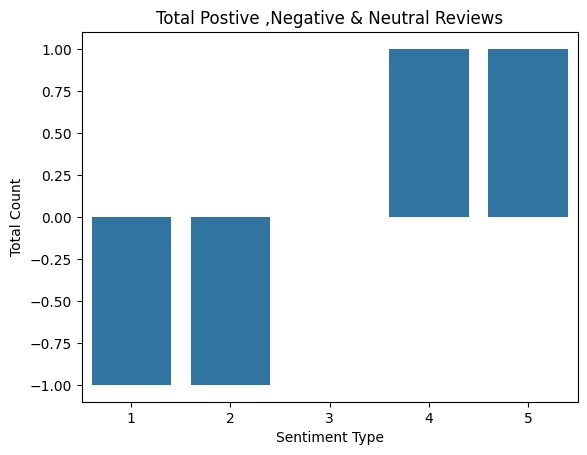

In [45]:
# So we can say that we almost have same number of reviews. That mean we have very good data.
sns.barplot(data=df, x='Rating', y='Sentiment')
plt.xlabel("Sentiment Type");
plt.ylabel("Total Count");
plt.title("Total Postive ,Negative & Neutral Reviews");

<Axes: xlabel='Rating', ylabel='Sentiment'>

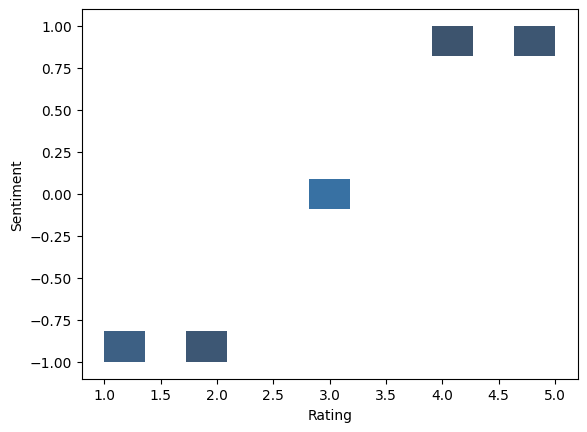

In [46]:
sns.histplot(data=df, x='Rating', y='Sentiment')

In [47]:
#svm

In [48]:
from sklearn.svm import SVC

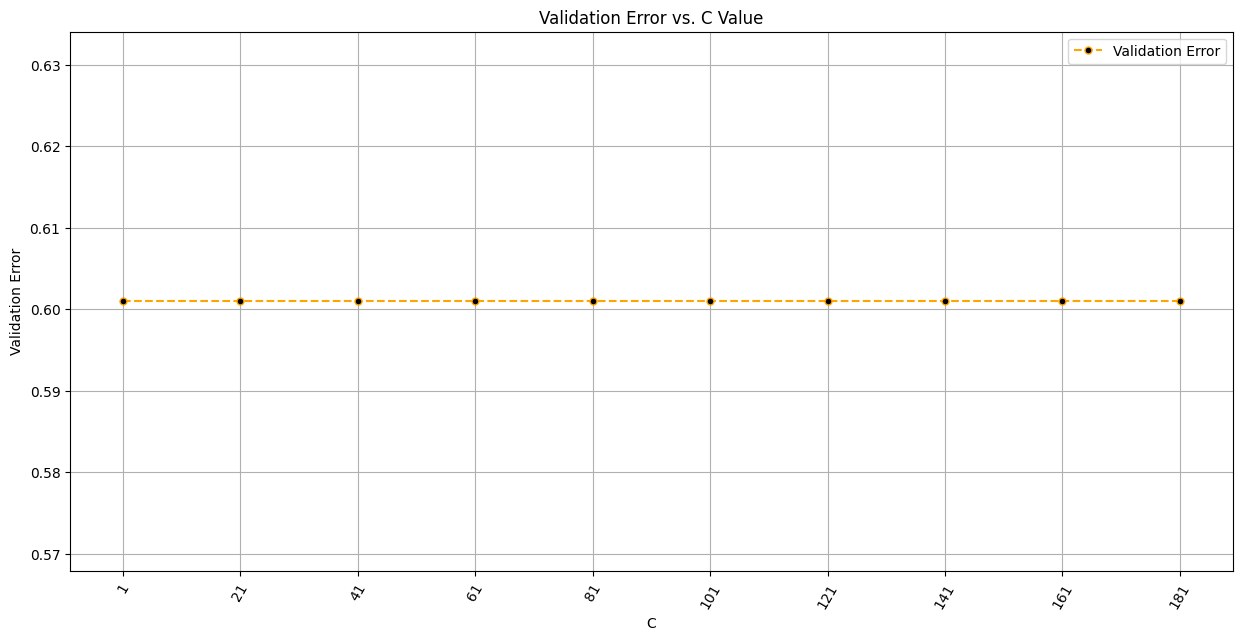

In [49]:
from sklearn.model_selection import cross_val_score

val_rate = []
c_range =  range(1,200,20)

for i in c_range:
    
    svm = SVC(C=i, kernel='linear')
    
    val_error = 1 - cross_val_score(svm, X_train, y_train,cv=9).mean()
    val_rate.append(val_error)


# Plot settings
plt.figure(figsize=(15,7))
plt.plot(c_range, val_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')

plt.xticks(np.arange(c_range.start, c_range.stop, c_range.step), rotation=60)
plt.grid()
plt.legend()
plt.title('Validation Error vs. C Value')
plt.xlabel('C')
plt.ylabel('Validation Error')
plt.show()

In [50]:
svm = SVC(kernel='linear',C=9).fit(X_train, y_train)

In [51]:
svm.fit(X_train, y_train)

SVC(C=9, kernel='linear')

In [52]:
pred = svm.predict(X_test)

In [53]:
print('The accuracy score is:',accuracy_score(y_test, pred))
print('The confusion matrix is:','\n',confusion_matrix(y_test, pred))
print('The classification report is:','\n',classification_report(y_test, pred))

The accuracy score is: 0.49404761904761907
The confusion matrix is: 
 [[35  0 36]
 [10  0 15]
 [24  0 48]]
The classification report is: 
               precision    recall  f1-score   support

          -1       0.51      0.49      0.50        71
           0       0.00      0.00      0.00        25
           1       0.48      0.67      0.56        72

    accuracy                           0.49       168
   macro avg       0.33      0.39      0.35       168
weighted avg       0.42      0.49      0.45       168



In [54]:
svm = SVC(kernel='linear',C=42).fit(X_train, y_train)

In [55]:
svm.fit(X_train, y_train)

SVC(C=42, kernel='linear')

In [56]:
pred = svm.predict(X_test)

In [57]:
print('The accuracy score is:',accuracy_score(y_test, pred))
print('The confusion matrix is:','\n',confusion_matrix(y_test, pred))
print('The classification report is:','\n',classification_report(y_test, pred))

The accuracy score is: 0.49404761904761907
The confusion matrix is: 
 [[35  0 36]
 [10  0 15]
 [24  0 48]]
The classification report is: 
               precision    recall  f1-score   support

          -1       0.51      0.49      0.50        71
           0       0.00      0.00      0.00        25
           1       0.48      0.67      0.56        72

    accuracy                           0.49       168
   macro avg       0.33      0.39      0.35       168
weighted avg       0.42      0.49      0.45       168



In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import VarianceThreshold

from sklearn.feature_selection import SelectKBest, chi2

# Set k to a value that is <= number of features (in this case, 50 since you have 51 features)
X_new_train = SelectKBest(chi2, k=50).fit_transform(X_train, y_train)
X_new_test = SelectKBest(chi2, k=50).fit_transform(X_test, y_test)

# Build Logistic Regression Model and check accuracy
clf.fit(X_new_train, y_train)

new_predictions = clf.predict(X_new_test)

print('The accuracy score is:',accuracy_score(y_test,new_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,new_predictions))
print('The classification report is:','\n',classification_report(y_test,new_predictions))

The accuracy score is: 0.4226190476190476
The confusion matrix is: 
 [[14  0 57]
 [ 7  0 18]
 [15  0 57]]
The classification report is: 
               precision    recall  f1-score   support

          -1       0.39      0.20      0.26        71
           0       0.00      0.00      0.00        25
           1       0.43      0.79      0.56        72

    accuracy                           0.42       168
   macro avg       0.27      0.33      0.27       168
weighted avg       0.35      0.42      0.35       168

